In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
_DATA = '../data'
_RESULT = '../result'

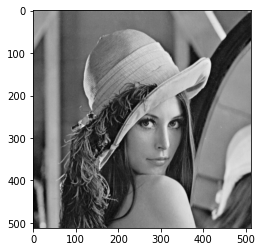

In [57]:
lena_img = cv2.imread(os.path.join(_DATA, 'lena512.png'))
baboon_img = cv2.imread(os.path.join(_DATA, 'baboon512.png'))
lena_img = cv2.cvtColor(lena_img, cv2.COLOR_BGR2GRAY)
baboon_img = cv2.cvtColor(baboon_img, cv2.COLOR_BGR2GRAY)

lena_arr = lena_img.copy()
lena_arr.astype(float)

baboon_arr = baboon_img.copy()
baboon_arr.astype(float)

plt.imshow(lena_img, cmap='gray')

In [60]:
def show_grid(list_imgs, titles):
    fig=plt.figure(figsize=(20, 7))
    columns = len(list_imgs)
    rows = 1
    for i in range(0, columns*rows):
        img = list_imgs[i]
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.title(titles[i])

#### Calculate Modulo

`b = a - m. *floor(a./m)`

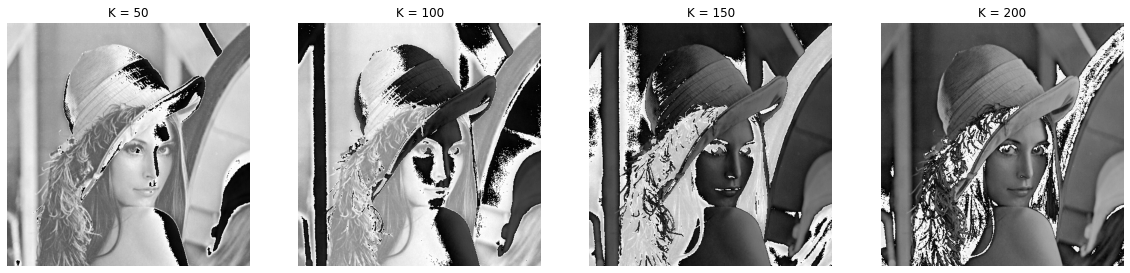

In [101]:
list_images = []
list_titles = []
for k in range(50,250,50):
    lena_lsb_k = np.mod(lena_arr + k, 256)
    list_images.append(lena_lsb_k)
    list_titles.append('K = ' + str(k))
    
show_grid(list_images, list_titles)

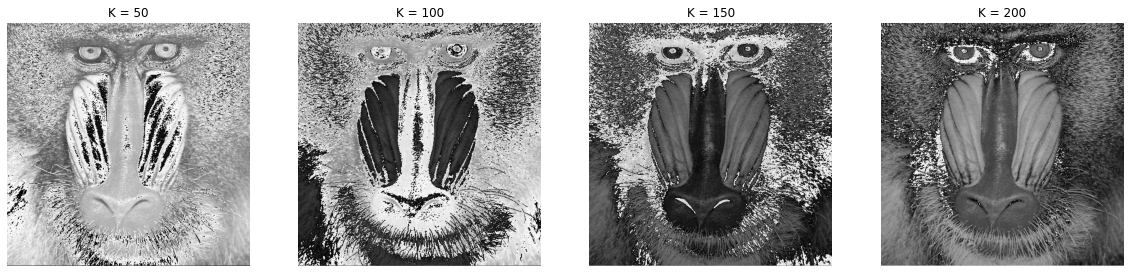

In [63]:


list_images = []
list_titles = []
for k in range(50,250,50):
    baboon_lsb_k = np.mod(baboon_arr + k, 256)
    list_images.append(baboon_lsb_k)
    list_titles.append('K = ' + str(k))
    
show_grid(list_images, list_titles)

#### Random generate a Key to map into image as encoding

each pixel level maps with a value in K, so create 256 K values correspoding to 0 to 255 in 8bits image.

such as k = [9, 113, 214, ...] and pixel level is [0,1,2,..]. To encode 0 with k[0], 1 with k[1], and 2 with k[2]. So, `y = k[x]`

256


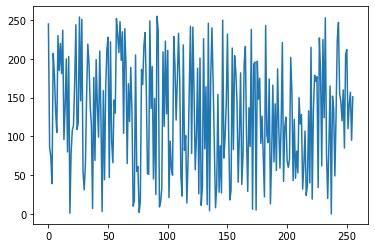

In [64]:
## random permutation K
rand_k = np.random.permutation(256)
print(len(rand_k))
plt.plot(rand_k)

In [75]:
rand_k[:10]

array([245,  86,  74,  39, 207, 180, 134, 105, 230, 185])

In [82]:
def encode_image(image, key):
    """
    function for encoding image by a key
    param:
        image: original image gray scale
        key: key array
    return:
        encoded image
    """
    enc_img = np.zeros(image.shape)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            enc_img[i, j] = key[image[i][j]]
    return enc_img

def decode_image(image, key):
    """
        function for decoding image by a key
    param:
        image: encoded image
        key: key array
    return:
        decoded image
    """
    dec_img = np.zeros(image.shape)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            dec_img[i, j] = np.where(key == image[i][j])[0]
    return dec_img

[[137. 137. 137. ... 148. 103.  12.]
 [137. 137. 137. ... 148. 103.  12.]
 [137. 137. 137. ... 148. 103.  12.]
 ...
 [123. 123.  47. ... 172.  58.  94.]
 [  3.   3. 130. ... 121. 233.  48.]
 [  3.   3. 130. ... 121. 233.  48.]]


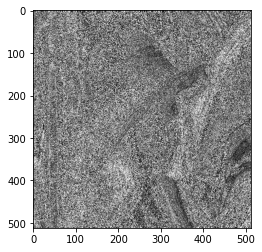

In [85]:
lena_enc = encode_image(lena_arr, rand_k)
print(lena_enc)
plt.imshow(lena_enc, cmap='gray')

[[168. 168. 168. ... 176. 160. 133.]
 [168. 168. 168. ... 176. 160. 133.]
 [168. 168. 168. ... 176. 160. 133.]
 ...
 [ 44.  44.  51. ... 108. 103. 102.]
 [ 45.  45.  56. ... 107. 109. 111.]
 [ 45.  45.  56. ... 107. 109. 111.]]


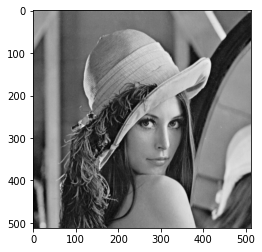

In [86]:
lena_dec = decode_image(lena_enc, rand_k)
print(lena_dec)
plt.imshow(lena_dec, cmap='gray')

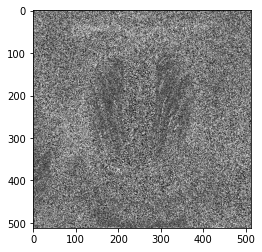

In [87]:
baboon_enc = encode_image(baboon_arr, rand_k)
# print(baboon_enc)
plt.imshow(baboon_enc, cmap='gray')

#### Illustrations on image encryption and Steganography

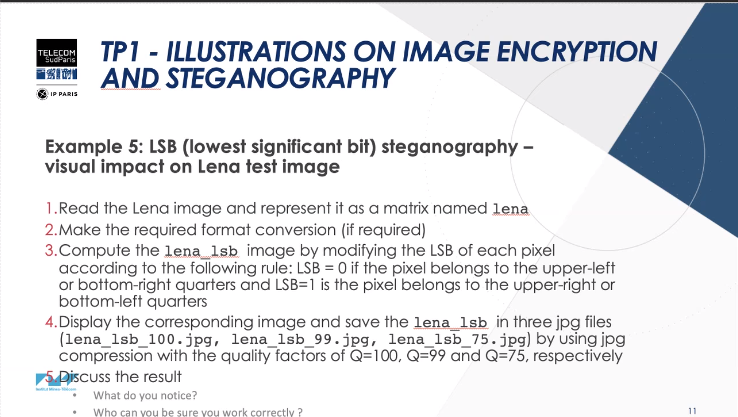

In [96]:
def encrypt_stegano(image):
    """
    decouple into 4 areas
    param:
        original image
    return:
        encoded image
    """
    enc_image = np.zeros(image.shape)
    w, h = image.shape
    for i in range(w):
        for j in range(h):
            if ((i <= w //2) and ( j <= h //2)) or ((i > w //2) and ( j > h //2)):
                ## lsb_0
                enc_image[i, j] = image[i,j] - np.mod(image[i,j],2)
            else:
                ## lsb_1
                enc_image[i, j] = image[i,j] - np.mod(image[i,j],2) + 1
    return enc_image

[[168. 168. 168. ... 177. 161. 133.]
 [168. 168. 168. ... 177. 161. 133.]
 [168. 168. 168. ... 177. 161. 133.]
 ...
 [ 45.  45.  51. ... 108. 102. 102.]
 [ 45.  45.  57. ... 106. 108. 110.]
 [ 45.  45.  57. ... 106. 108. 110.]]


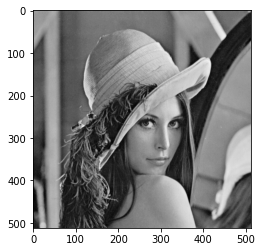

In [100]:
lena_enc = encrypt_stegano(lena_arr)
print(lena_enc)
plt.imshow(lena_enc, cmap='gray')

In [106]:
for q in [100, 99, 75]:
    img_out_file = os.path.join(_RESULT, f'lena_lsb_{q}.jpg')
    cv2.imwrite(img_out_file, lena_enc, [int(cv2.IMWRITE_JPEG_QUALITY), q])

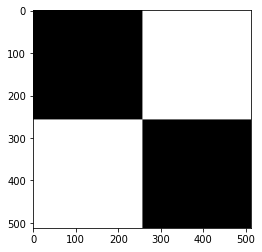

In [121]:
## check the lena_lsb
plt.imshow(np.mod(lena_enc,2), cmap='gray')

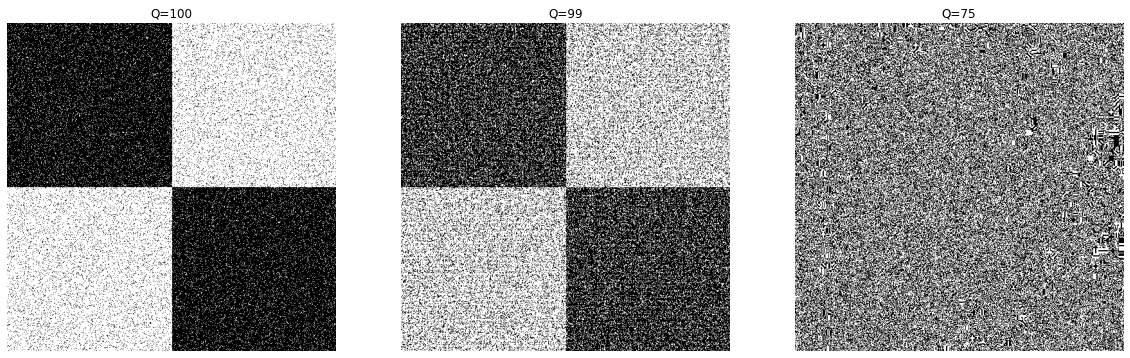

In [120]:
## check the compressed image
list_images = []
list_titles = []
for q in [100, 99, 75]:
    img_in_file = os.path.join(_RESULT, f'lena_lsb_{q}.jpg')
    img_arr = cv2.imread(img_in_file)[:,:,2]
    img_arr_w_mod = np.mod(img_arr,2)
    list_images.append(img_arr_w_mod)
    list_titles.append('Q='+str(q))
show_grid(list_images, list_titles)

In [123]:
def encrypt_stegano_2lsb(image):
    """
    decouple into 4 areas
    param:
        original image
    return:
        encoded image
    """
    enc_image = np.zeros(image.shape)
    w, h = image.shape
    for i in range(w):
        for j in range(h):
            if ((i <= w //2) and ( j <= h //2)):
                ## lsb_0
                enc_image[i, j] = image[i,j] - np.mod(image[i,j],4)
            elif ((i > w //2) and ( j <= h //2)):
                enc_image[i, j] = image[i,j] - np.mod(image[i,j],4) + 1
            elif ((i <= w //2) and ( j > h //2)):
                enc_image[i, j] = image[i,j] - np.mod(image[i,j],4) + 2
            else:
                enc_image[i, j] = image[i,j] - np.mod(image[i,j],4) + 3
    return enc_image

[[168. 168. 168. ... 178. 162. 134.]
 [168. 168. 168. ... 178. 162. 134.]
 [168. 168. 168. ... 178. 162. 134.]
 ...
 [ 45.  45.  49. ... 111. 103. 103.]
 [ 45.  45.  57. ... 107. 111. 111.]
 [ 45.  45.  57. ... 107. 111. 111.]]


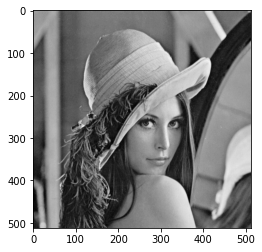

In [126]:
lena_enc_2lsb = encrypt_stegano_2lsb(lena_arr)
print(lena_enc_2lsb)
plt.imshow(lena_enc_2lsb, cmap='gray')

In [127]:
for q in [100, 99, 75]:
    img_out_file = os.path.join(_RESULT, f'lena_2lsb_{q}.jpg')
    cv2.imwrite(img_out_file, lena_enc_2lsb, [int(cv2.IMWRITE_JPEG_QUALITY), q])